# chapter6.3

---

---

# intro 

`-` rewind

- 훈련 데이터의 최적의 분류를 위한 거리를 구하기 위해 w를 찾을 것이다.
- 또한 w를 찾는 문제를 듀얼 폼을 바꾸어 KKT조건에 부합한 $\alpha$를 찾는 문제로 바뀌었음

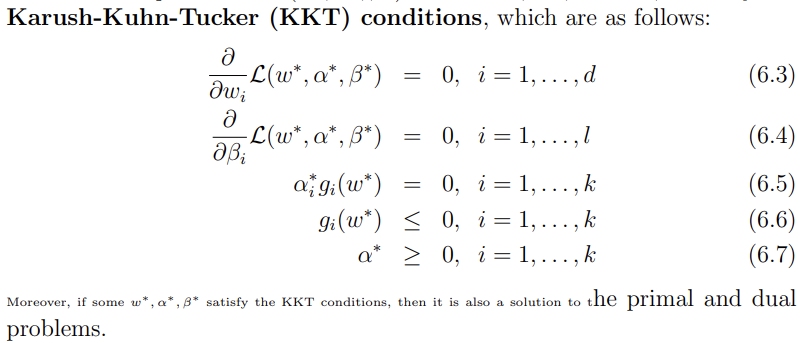

`-` why?

- convex 최적화 문제이기 때문에 local minimum이 곧 global minimum 이다
- 따라서 quadratic programming을 통해 covex optimization 문제로 바뀌게 되어 최적의 해로 찾는 것
- 그렇다면 주어진 데이터가 늘 잘 분류가 될까? $\rightarrow$ 그렇지는 않다.

---

# 6.7  Regularization and the non-separable case

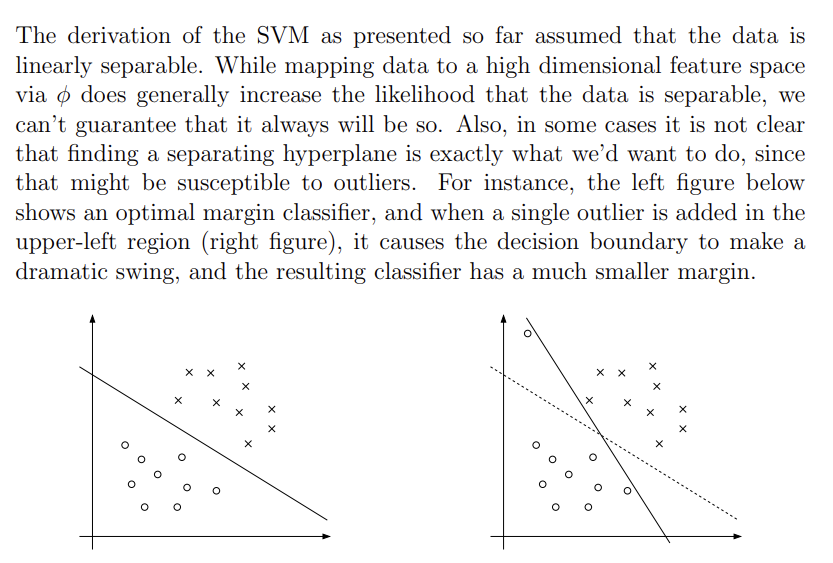

- 지금까지 제시된 svm은 선형적 분리가 되는 데이터를 가지고 가정했음
- 또한 $\phi$를 통해 높은 고차원의 분류도 가능하지만 무조건 그렇게 분류가 잘된다는 것은 아님
- 우리가 원하는 분리된 초평면을 찾는 것이 정확하지 않기 때문이다.
- 또한 이상치에 취약할 수도 있음
- 마진 근처에 존재하는 이상치는 decision boundary에 영향을 줄 수 있고 작은 마진을 갖게 될것

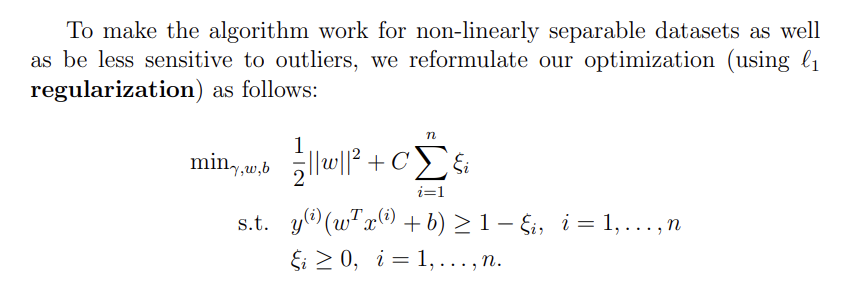


- 그래서 우리는 아웃라이어에 덜 민감한 선형으로 분리되지 않는 데이터셋에 대한 알고리즘을 만들어보기 위해 밑의 regularization을 더 해서 재구성을 해볼 것이다
- 예전 최적화 문제에 $C\sum_{i=1}^n \xi_i $를 더한 것

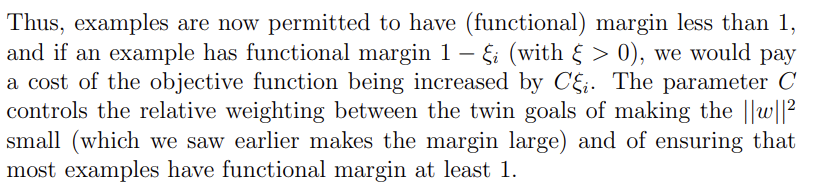

- 기존 margin은 무조건 support vector의 functional margin w의 거리가 1이 되어야 했고 그 margin안에 어떤 point가 들어오는 것을 허용하지 않았음
- 이제는 1보다 더 작은 어떠한 support vector를 허용할 것임
- 허용하게 될수록 우리는 $C\xi_i$ 커지는 cost를 지불해야한다 

따라서 parameter C는 $||w||$의 거리를 좁히는 것과 대부분의 예제 데이터의 functional margin의 거리가 최소한 
1이 되어야 되는 것을 보장해줘야하는 것 두 가지의 목표에 있어 조율하는 가중치가 될것이다

우린 SVM이 margin이 넓을 수록 잘 분류가 되었다고 볼 수가 있었다. 그러나  이상치에 둔감해지기 위해 또는 완벽하게 선형을 분리할 수 없는 경우 어느정도 오차를 허용해서 최적의 margin을 찾기 위해 기존 margin을 넓혀야 하는 목표와는 반대로 어느정도 margin이 좁아지는 것을 감안한다는 의미로 볼 수 있다

`-` Largrangian primal

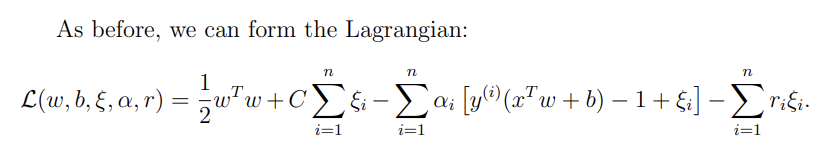

$$
\frac{\partial\mathcal{L}(w,b,\xi,\alpha,r)}{\partial w} \rightarrow w = \sum^n_{i=1}\alpha yx \\
\frac{\partial\mathcal{L}(w,b,\xi,\alpha,r)}{\partial b} \rightarrow \sum^n_{i=1}ay = 0 \\
\frac{\partial\mathcal{L}(w,b,\xi,\alpha,r)}{\partial \xi} \rightarrow C - \alpha - r = 0
$$

`-` Lagrangian을 이용한 dual problem

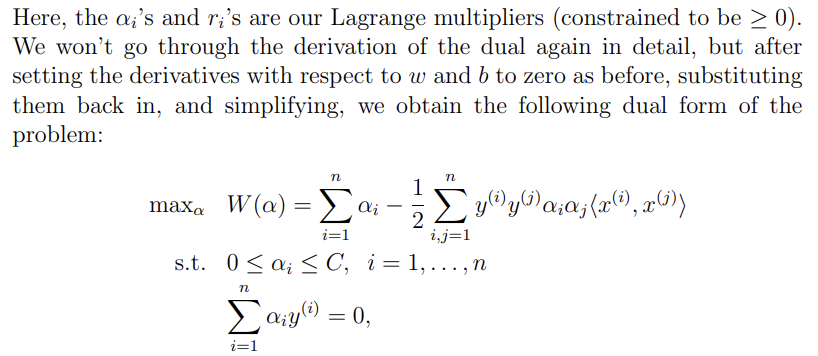

- 최대의 마진을 찾는데 있어서 $alpha$의 범위가 제한이 됨
- 즉 완벽하게 분류하고 싶은 decision boundary를 찾는 대신에 오차를 허용하면서 찾겠다는 의미

---

`-` KKT 조건을 통해 알 수 있는 정보

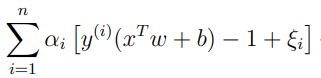

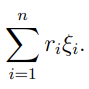

- 위의 저 두 조건은 KKT 조건에 따라 0이되어야 한다.
- 즉 $\alpha= 0$ or $[y(x^Tw+b)-1+\xi] = 0$
- $r = 0$ or $\xi = 0$

`-` $\alpha = 0$일 때 
- $C - \alpha-r = 0$ 이였으므로 $C = r$
- $r$이 어떠한 상수 값을 갖게 되므로 $\xi = 0$이 되어야 한다.
- 또한 $[y(x_i^Tw+b)-1] \ne 0$이므로 (0이 된다면 support vector)
- $x_i$ point는 support vector가 아님 

`-` $0 < \alpha < C$일 때 
- $C - \alpha-r = 0$ 이므로 $r$ 또한 어떠한 양수이어야함
- 즉 $r$이 어떠한 상수 값을 갖게 되므로 $\xi = 0$이 되어야 한다.
- 또한 $[y(x_i^Tw+b)-1] = 0$이 되어야 하므로 
- $x_i$ point는 decision boundary에 걸쳐 있는 support vector이다. 

`-` $\alpha = C$일 때
- $C - \alpha-r = 0$ 이였으므로 $r = 0$이 되어야함
- $r$이 0이 되었고 $\xi > 0$이 된다.
- $\alpha[y(x_i^Tw+b)-1+\xi] = 0$이 되어야하므로 $\alpha[y(x_i^Tw+b)-1]+ \alpha \xi = 0$일 것이고
- $\alpha \xi \ne 0$ 
- $x_i$ point는 decision boundary에 안쪽에 있는 support vector이다. 

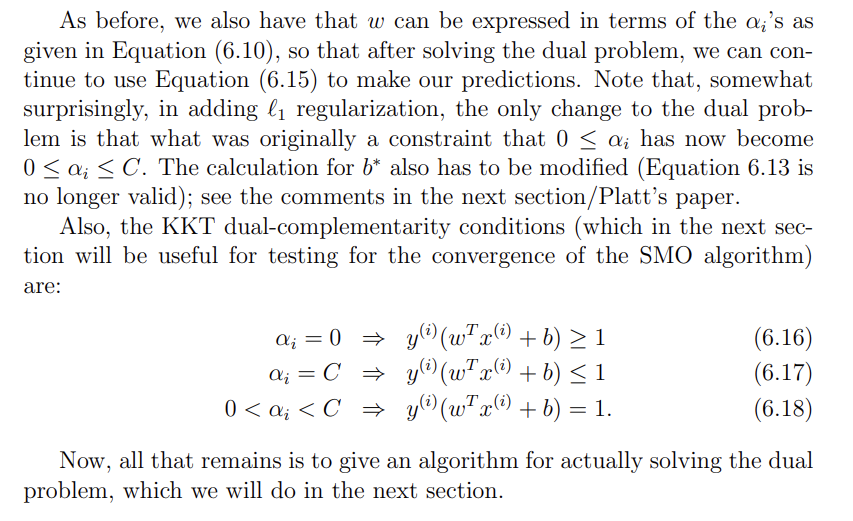

---

`-` 허용오차에 따른 분류 시각화(gpt)

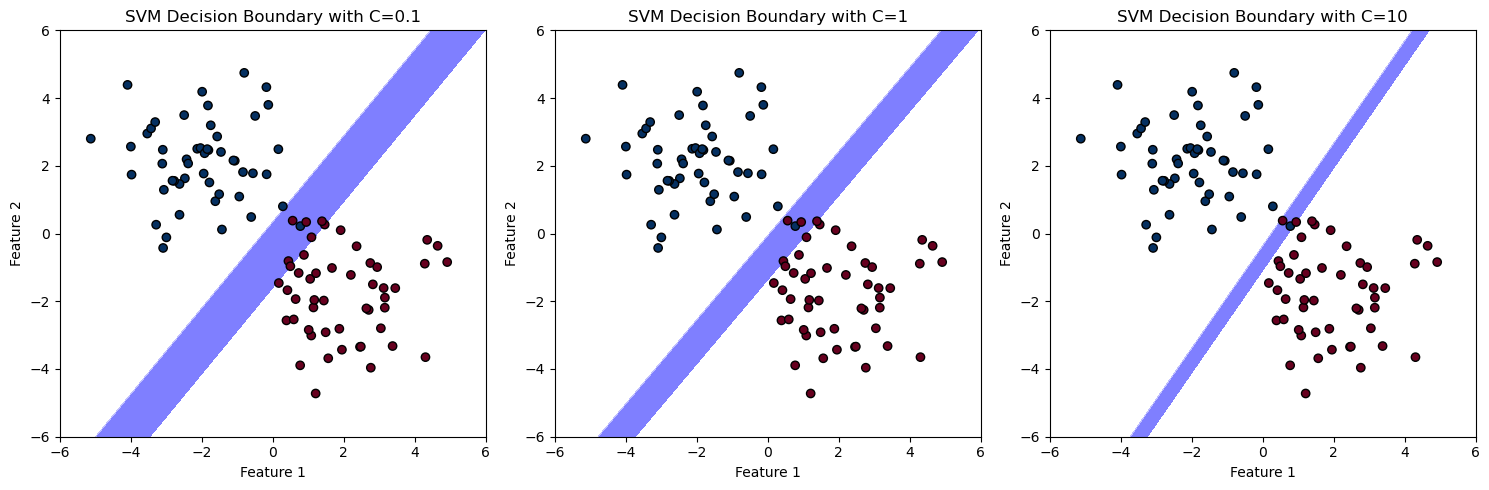

In [20]:
# 데이터 생성 (클래스 간격을 크게 설정)
np.random.seed(0)

mean1 = [-2, 2]
mean2 = [2, -2]
cov = [[1.5, 0], [0, 1.5]]
X1 = np.random.multivariate_normal(mean1, cov, 50)
X2 = np.random.multivariate_normal(mean2, cov, 50)
X = np.vstack((X1, X2))
y = np.hstack((np.ones(50), -np.ones(50)))

# 파라미터 C 값들
C_values = [0.1, 1, 10]

plt.figure(figsize=(15, 5))

for i, C in enumerate(C_values):
    # SVM 모델 초기화 및 학습
    svm_model = SVC(kernel='linear', C=C)
    svm_model.fit(X, y)

    # 시각화를 위한 그리드 생성
    xx, yy = np.meshgrid(np.linspace(-6, 6, 500), np.linspace(-6, 6, 500))
    Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 서브플롯 생성
    plt.subplot(1, 3, i+1)
    plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.5, colors=['blue', 'white', 'red'])
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, edgecolors='k')
    plt.title(f'SVM Decision Boundary with C={C}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()


---

# 6.8 The SMO algorithm (optional reading)

- sequential minimal optimization

`-` Coordinate ascent

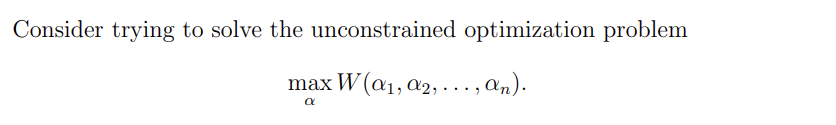

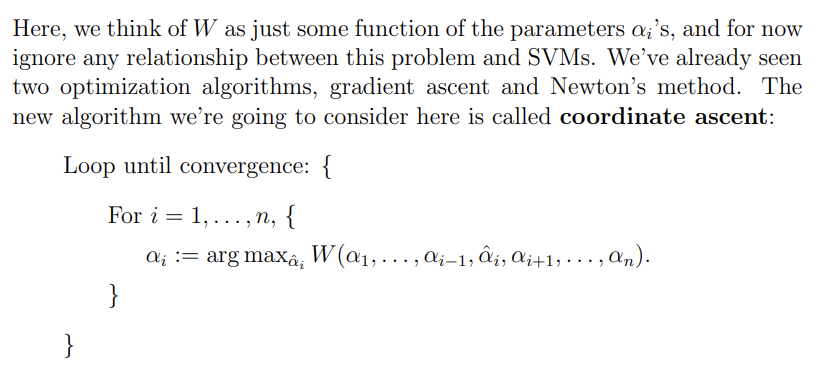

- 우리는 듀얼 형태의 이차 최적화 문제를 해결해야함
- $\alpha$의 최적 값을 찾고 해당 변수를 변화시키면서 함수 값을 최대로 만드는 변수를 찾음

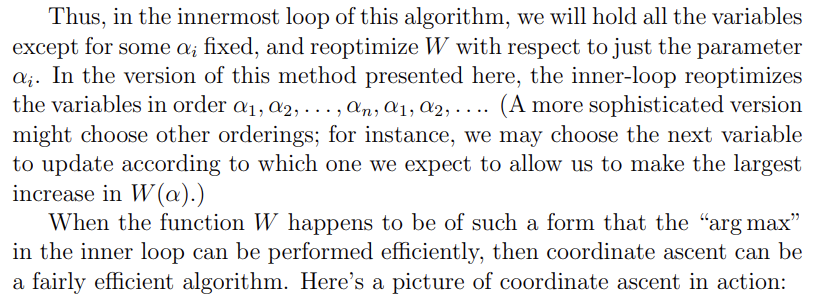

- 보통 이런 경우에 조정할 $\alpha_i$를 제외하고 나머지는 고정한 상태로 W를 reoptimize할 것임
- 또한 목적함수가 가장 크게 증가하게 만드는 변수에 따라 업데이트할 변수를 선택할 수도 있음
- 함수 W가 arg max 내부 고리가 효율적으로 수행될때, coordinate ascent는 상당히 효율적인 알고리즘이 될 수 있다.

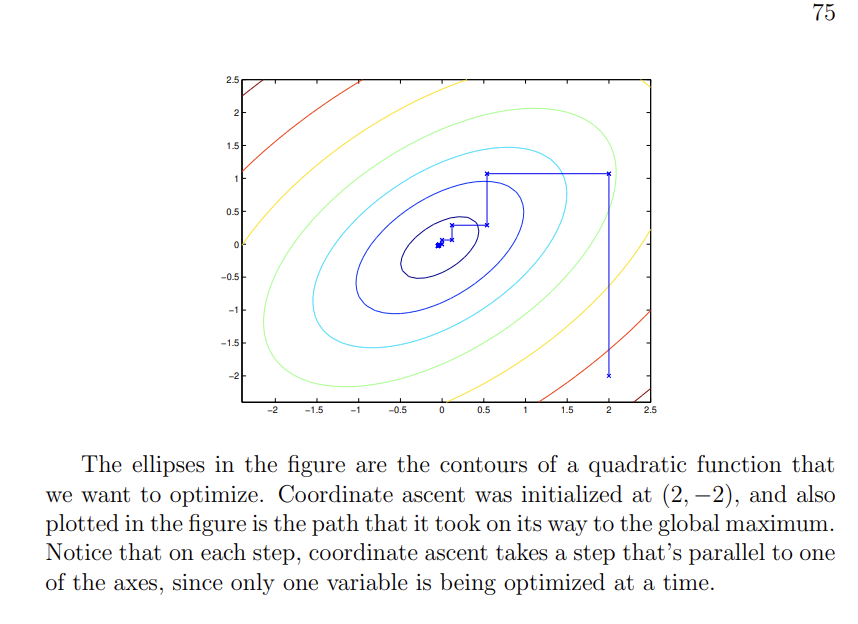

---

# 6.8.2 SMO

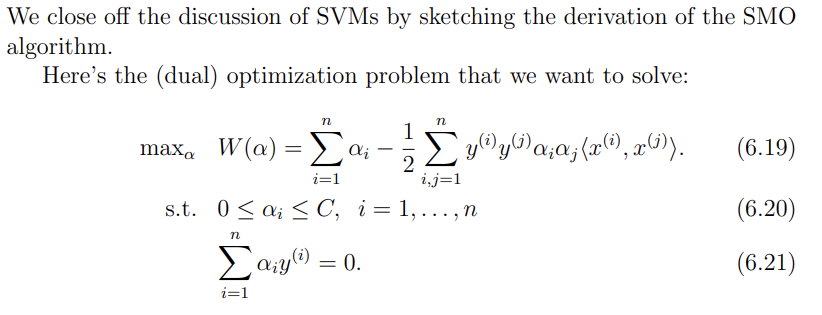

- 우리가 풀기 원하는 듀얼 최적화 문제

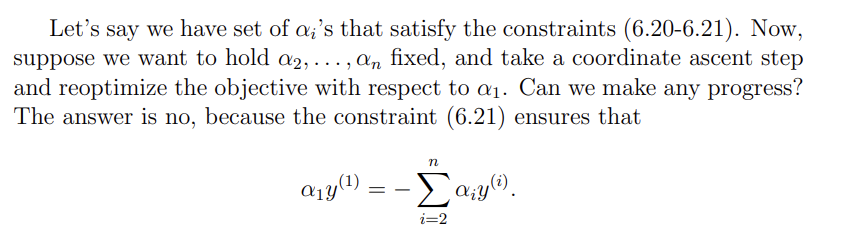


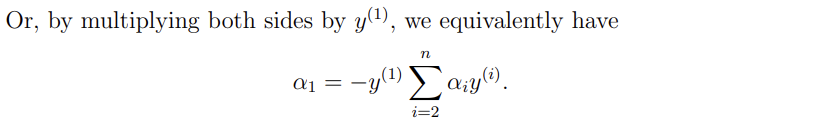

- $\alpha_1$를 제외하고 나머지 알파들을 고정한채 reoptimize를 하면 되는 것이냐?
- 그렇지 않다 그 이유가 위의식을 통해 알 수 있음
-  $\alpha_1$은 나머지 $\alpha_i$의 영향으로 결정되는 것임
- 그렇기 때문에 $\alpha_i$를 고정하고 $\alpha_1$를 바꾸는 것은 불가능하다

`-` how we can solve it?

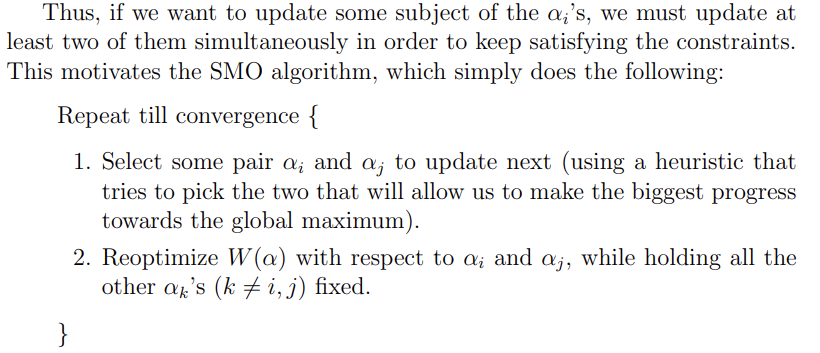

- 따라서 우리가 일부의 $\alpha$를 업데이트 하고 싶다면 조건에 부합하기 위해 최소한 2개이상의 $\alpha$를 업데이트할 것이다.
- Repeat till convergence
    - 알파 페어를 선택한다(가장 많이 이동할 수 있는)
    - 업데이트된 알파페어를 반영한 목적함수를 reoptimze한다. 

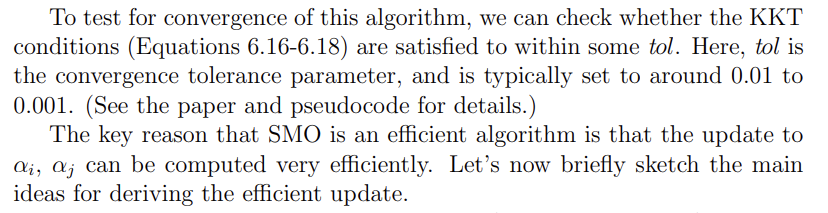

- 알고리즘의 수렴성을 테스트하기 위해서 우리는 KKT조건이 일부 tol에서 만족하는지 봐야한다.
- tol is the convergence tolerance parameter
- 효율적인 SMO의 주요 키는 알파를 매우 효율적으로 계산하는 것에 있음

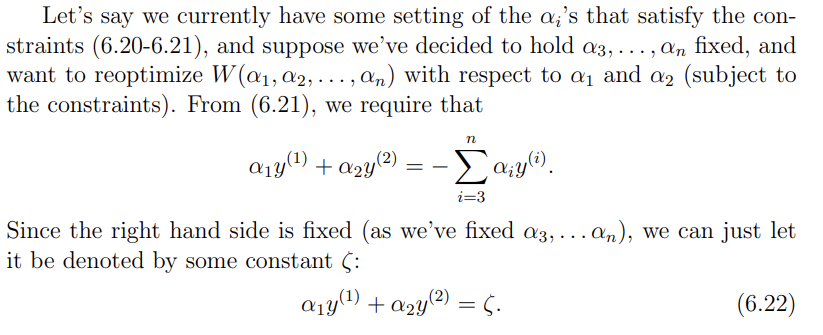

- $\alpha_1y + \alpha_2y$ 를 제외한 나머지 $\alpha$ 고정
- $\alpha_1y + \alpha_2y =\zeta$ 정의하겠음

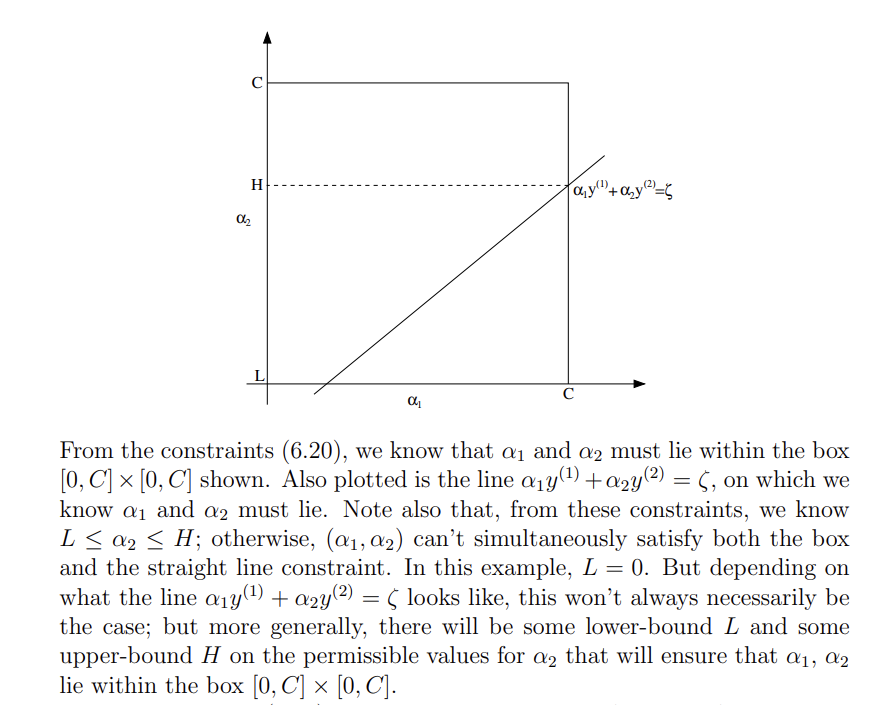

- 제약조건에 따라서 $\alpha_1y + \alpha_2y =\zeta$는 [0,C]*[C,0]에 놓여있어야 한다 (KKT조건에 부합)
- $\alpha_2$의 값을 조정

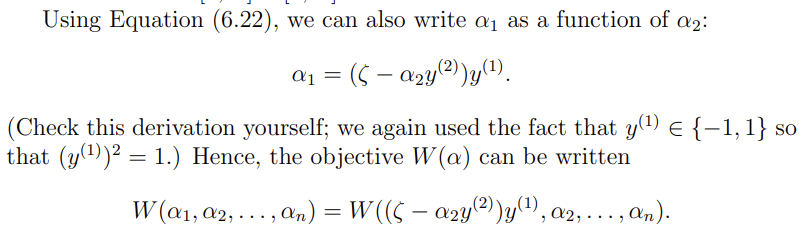

- 이어서 $\alpha_1$의 값도  $\alpha_2$에 따라서 업데이트 되어지고 이를 다시
- reoptimizing

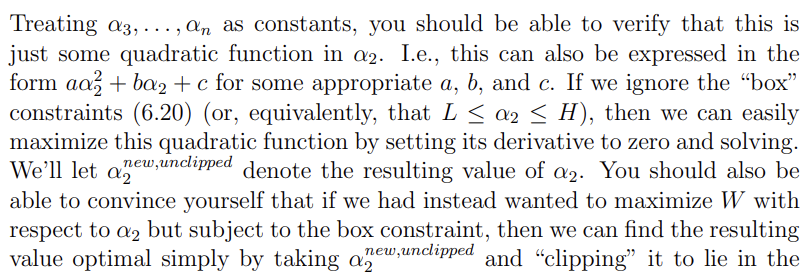
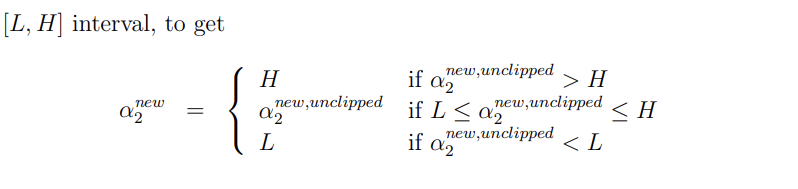

`-` 구현 예제 gpt

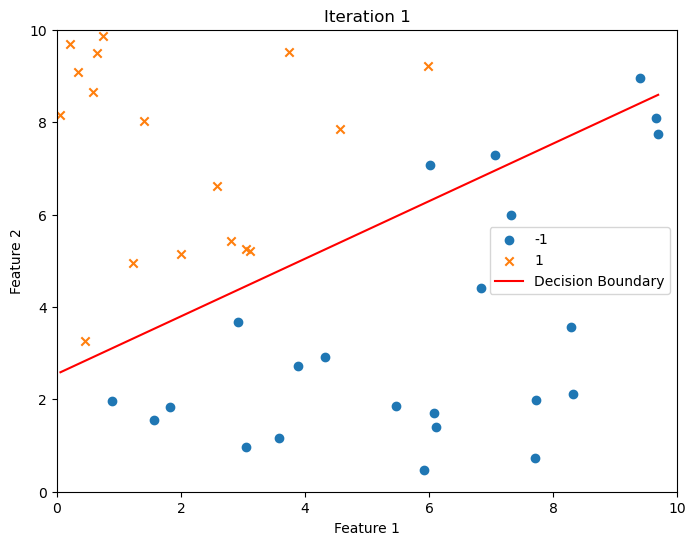

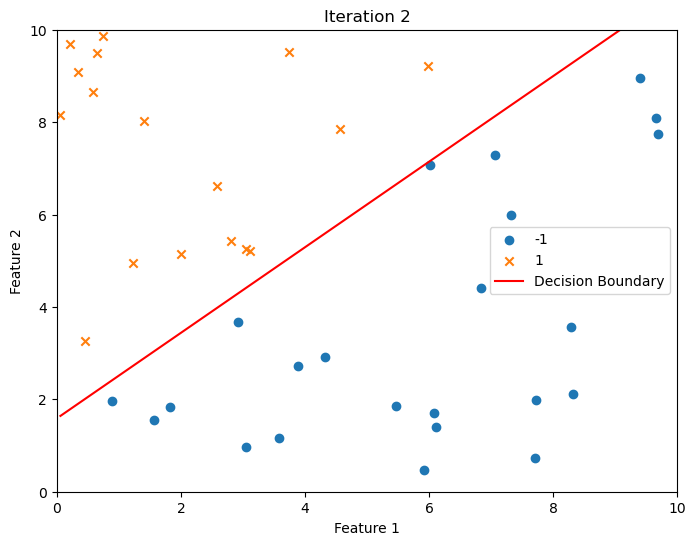

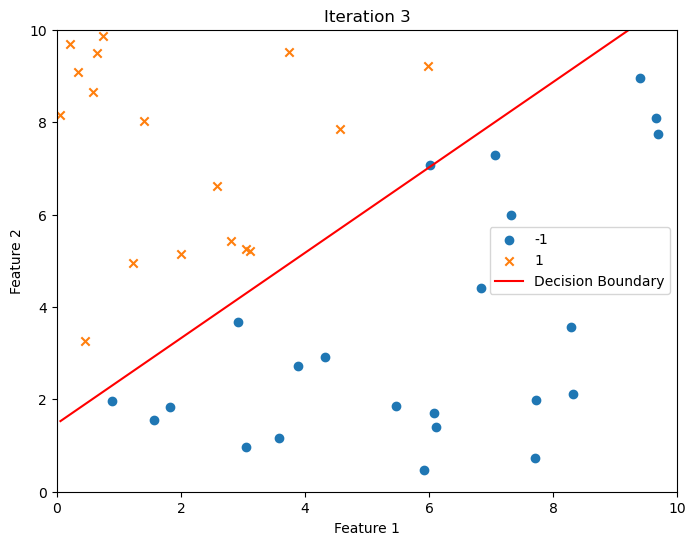

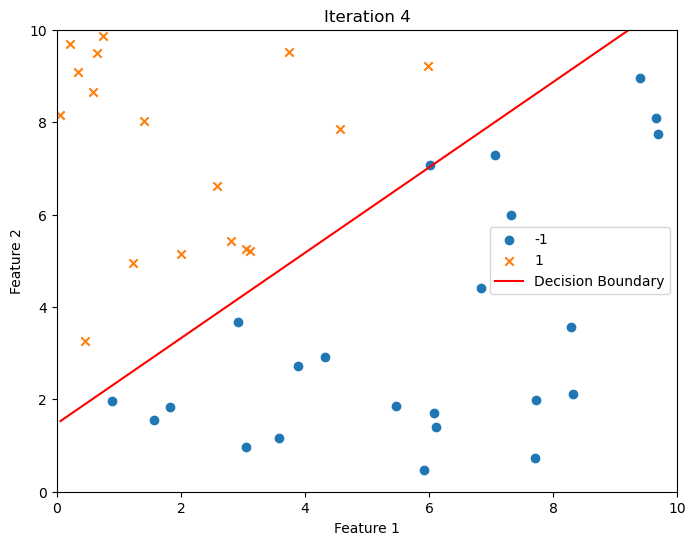

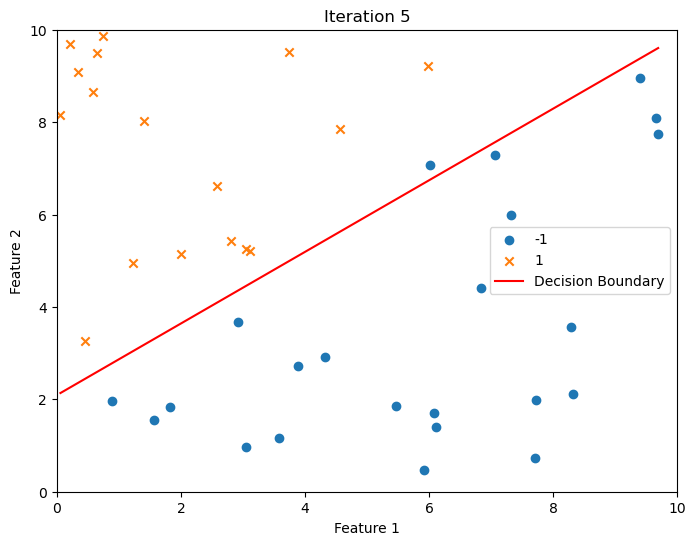

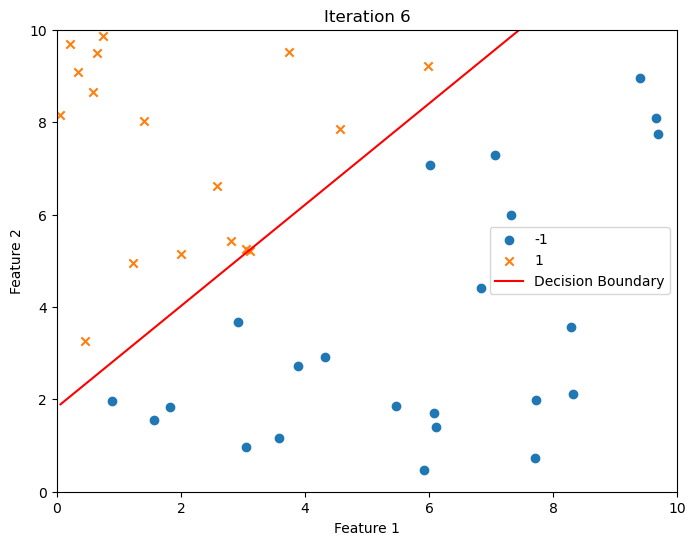

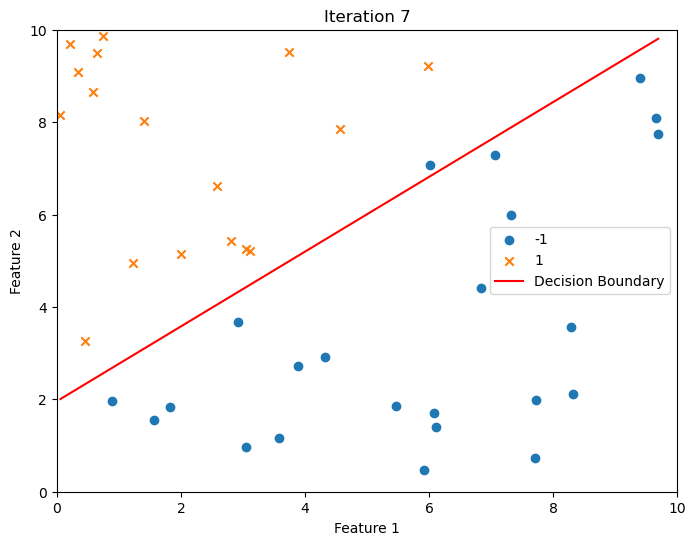

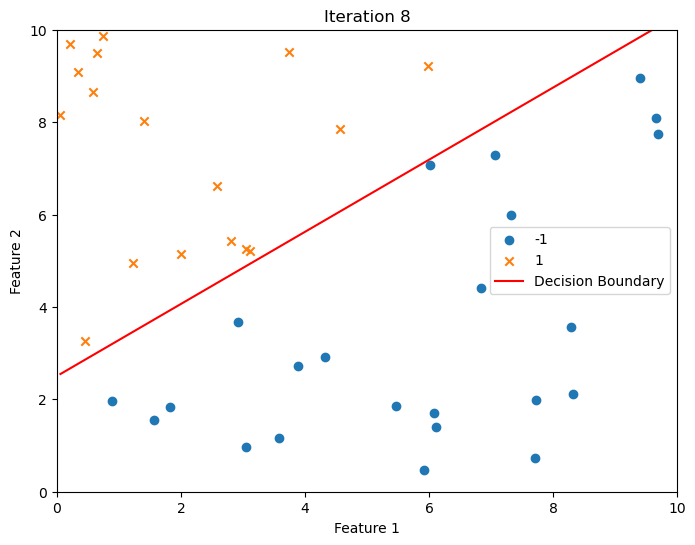

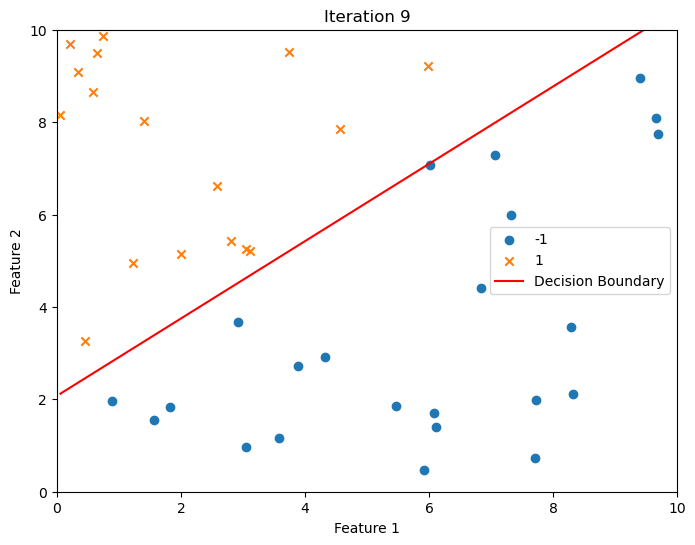

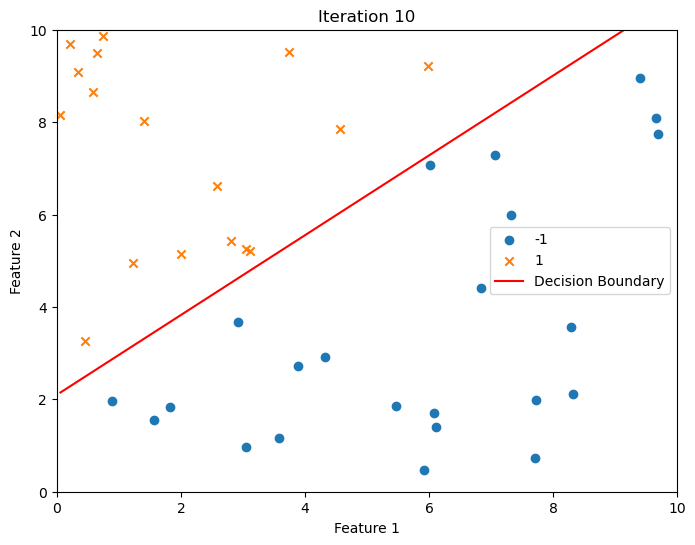

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def plot_iteration(X, y, w, b, iteration):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], marker='o', label='-1')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], marker='x', label='1')
    
    x_min = np.min(X[:, 0])
    x_max = np.max(X[:, 0])
    x_range = np.linspace(x_min, x_max, 100)
    y_range = (-b - w[0] * x_range) / w[1]
    
    plt.plot(x_range, y_range, color='red', label='Decision Boundary')
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.title(f'Iteration {iteration}')
    plt.xlim(0, 10)
    plt.ylim(0, 10)
    plt.show()

def generate_linearly_separable_data(n=40, seed=42):
    np.random.seed(seed)
    X = np.random.rand(n, 2) * 10
    y = np.where(X[:, 1] > X[:, 0] + 2, 1, -1)
    return X, y

def visualize_smo(X, y, C, tol, max_passes):
    m, n = X.shape
    alpha = np.zeros(m)
    b = 0
    passes = 0
    
    for iteration in range(1, max_passes+1):
        num_changed_alphas = 0
        for i in range(m):
            E_i = np.dot(alpha * y, np.dot(X, X[i])) + b - y[i]
            if (y[i] * E_i < -tol and alpha[i] < C) or (y[i] * E_i > tol and alpha[i] > 0):
                j = np.random.choice([k for k in range(m) if k != i])
                E_j = np.dot(alpha * y, np.dot(X, X[j])) + b - y[j]

                alpha_i_old = alpha[i]
                alpha_j_old = alpha[j]

                if y[i] != y[j]:
                    L = max(0, alpha[j] - alpha[i])
                    H = min(C, C + alpha[j] - alpha[i])
                else:
                    L = max(0, alpha[i] + alpha[j] - C)
                    H = min(C, alpha[i] + alpha[j])

                if L == H:
                    continue

                eta = 2 * np.dot(X[i], X[j]) - np.dot(X[i], X[i]) - np.dot(X[j], X[j])

                if eta >= 0:
                    continue

                alpha[j] -= y[j] * (E_i - E_j) / eta
                alpha[j] = np.clip(alpha[j], L, H)

                if abs(alpha[j] - alpha_j_old) < 1e-5:
                    continue

                alpha[i] += y[i] * y[j] * (alpha_j_old - alpha[j])
                b1 = b - E_i - y[i] * (alpha[i] - alpha_i_old) * np.dot(X[i], X[i]) - y[j] * (alpha[j] - alpha_j_old) * np.dot(X[i], X[j])
                b2 = b - E_j - y[i] * (alpha[i] - alpha_i_old) * np.dot(X[i], X[j]) - y[j] * (alpha[j] - alpha_j_old) * np.dot(X[j], X[j])

                if 0 < alpha[i] < C:
                    b = b1
                elif 0 < alpha[j] < C:
                    b = b2
                else:
                    b = (b1 + b2) / 2

                num_changed_alphas += 1
        
        if num_changed_alphas == 0:
            passes += 1
        else:
            passes = 0
        
        if passes >= max_passes:
            break
        
        w = np.dot(alpha * y, X)
        plot_iteration(X, y, w, b, iteration)

# 데이터 생성
X, y = generate_linearly_separable_data()

# 하이퍼파라미터 설정
C = 1.0  # Slack 변수 조절
tol = 1e-3  # 허용 오차
max_passes = 10  # 최대 반복 횟수

# SMO 알고리즘 실행 및 시각화
visualize_smo(X, y, C, tol, max_passes)
